## Лаб.07 PCA редукция

### Уменьшение размерности методом главных компонент

---

#### Входные данные:
Датасет `data_alc.csv`

#### Задание:
Написать программный код для вычисления главных компонент для исходных данных, применить результаты вычислений для понижения размерности данных. Обучить алгоритмы кластеризации любыми двумя методами на исходных и редуцированных данных, сравнить результаты кластеризации.

**Порядок выполнения работы:**
1. Загрузите данные в датафрейм. Изучите его: выясните, каково число уникальных значений целевого свойства Class. Постройте диаграмму в виде облака точек в координатах 'OD280/OD315 of diluted wines', 'Flavanoids' с раскраской в соответствии с метками класса.
2. Выделите столбец меток класса в данные y и оставшуюся часть датафрейма в свойства X. Отмасштабируйте свойства при помощи класса StandardScaler(), сохраните как датафрейм.
3. Обучите любые два метода кластеризации на данных датафреймов X, вычислите метрики качества кластеризации: однородность, полнота, V-мера, ARI, AMI, силуэт, инерция.
4. Обучите на данных X метод главных компонент: `sklearn.decomposition.PCA`, с параметром `n_components=None`. Выведите доли дисперсии, объясняемые каждой из компонент.
5. Постройте график зависимости доли дисперсии от номера компоненты. Используйте для этого массив `explained_variance_ratio_`, в котором нулевой элемент отвечает за первую главную компонента, под индексом 1 – за вторую компоненту и так далее.
6. При помощи функции `pca.transform` преобразуйте исходные данные в соответствии с обученным методом главных компонентов. Редуцированные данные сохраните в датафрейм.
7. Выведите на диаграмму облако раскрашенных точек, но в координатах первой и второй главных компонент (столбцы `[0]` и `[1]` матрицы редуцированных данных.
8. Обучите снова те же методы кластеризации, но на редуцированных данных, вычислите метрики и сравните с предыдущими результатами.

---

1. Загрузите данные в датафрейм. Изучите его: выясните, каково число уникальных значений целевого свойства Class. Постройте диаграмму в виде облака точек в координатах 'OD280/OD315 of diluted wines', 'Flavanoids' с раскраской в соответствии с метками класса.

In [ ]:
# подключим необходимые библиотеки

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.metrics import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

In [ ]:
# добавим данные в датаафрейм

# use this line if on Jupyter
# df = pd.read_csv('data_alc.csv')

# use this line if on Colab
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/data/data_alc.csv')
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# find out what the number of unique values of the target Class property is
print(df['Class'].unique())

[1 2 3]


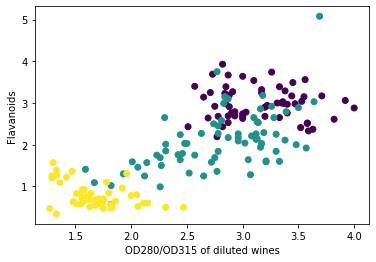

In [ ]:
plt.scatter(df['OD280/OD315 of diluted wines'], df['Flavanoids'], c=df['Class'])
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Flavanoids')
plt.show();

---

2. Выделите столбец меток класса в данные y и оставшуюся часть датафрейма в свойства X. Отмасштабируйте свойства при помощи класса StandardScaler(), сохраните как датафрейм.

In [ ]:
# scale the class label column into 'y' data and the rest of the dataframe into 'X' properties

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X = scaler.fit_transform(X)

# save the scaled data to a new dataframe

X = pd.DataFrame(X, columns=df.columns[:-1])
X['Class'] = y

In [ ]:
X.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,1,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


---

3. Обучите любые два метода кластеризации на данных датафреймов X, вычислите метрики качества кластеризации: однородность, полнота, V-мера, ARI, AMI, силуэт, инерция.

In [ ]:
# train any two clustering methods on X dataframe data, calculate clustering
# quality metrics: uniformity, recall, V-score, ARI, AMI, silhouette, inertia

# KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print('KMeans:')
print()
print('Silhouette score: ', silhouette_score(X, y_pred))
print('Homogeneity score: ', homogeneity_score(y, y_pred))
print('Completeness score: ', completeness_score(y, y_pred))
print('V-measure score: ', v_measure_score(y, y_pred))
print('Adjusted Rand score: ', adjusted_rand_score(y, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y, y_pred))
print('Inertia: ', kmeans.inertia_)

KMeans:

Silhouette score:  0.2779213822154089
Homogeneity score:  0.8372688865150703
Completeness score:  0.8344475880291652
V-measure score:  0.8358558565678332
Adjusted Rand score:  0.8297415339237041
Adjusted Mutual Info score:  0.8341146256993133
Inertia:  1196.4427257318262


In [ ]:
# agglomerative clustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)
y_pred = agg.labels_

print('Agglomerative Clustering:')
print()
print('Silhouette score: ', silhouette_score(X, y_pred))
print('Homogeneity score: ', homogeneity_score(y, y_pred))
print('Completeness score: ', completeness_score(y, y_pred))
print('V-measure score: ', v_measure_score(y, y_pred))
print('Adjusted Rand score: ', adjusted_rand_score(y, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y, y_pred))

Agglomerative Clustering:

Silhouette score:  0.2696045532682067
Homogeneity score:  0.73772657791012
Completeness score:  0.7319515510127995
V-measure score:  0.7348277181213978
Adjusted Rand score:  0.7190946237450169
Adjusted Mutual Info score:  0.732021756897634


---

4. Обучите на данных X метод главных компонент: `sklearn.decomposition.PCA`, с параметром `n_components=None`. Выведите доли дисперсии, объясняемые каждой из компонент.

In [ ]:
# train the principal component method on X data: sklearn.decomposition.PCA, with the parameter
# n_components = None. Print the fractions of the variance explained by each of the components

pca = PCA(n_components=None) # can try with n_components=5 to see the difference with metrics
pca.fit(X)

print('Explained variance ratio: \n\n', pca.explained_variance_ratio_)

Explained variance ratio: 

 [0.40615133 0.16082768 0.10837432 0.07318868 0.06411381 0.05080356
 0.04358486 0.02604468 0.02108254 0.01846414 0.0144277  0.00931459
 0.00362211]


---

5. Постройте график зависимости доли дисперсии от номера компоненты. Используйте для этого массив `explained_variance_ratio_`, в котором нулевой элемент отвечает за первую главную компонента, под индексом 1 – за вторую компоненту и так далее.

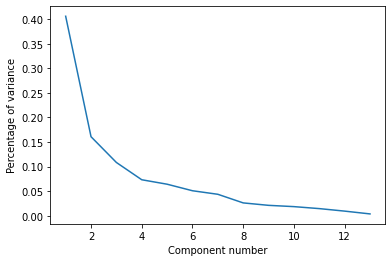

In [ ]:
# plot a graph of the percentage of variance versus the component number. use the explained_variance_ratio_ array for this,
# in which the zero element is responsible for the first main component, at index 1 - for the second component, and so on

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Component number')
plt.ylabel('Percentage of variance')
plt.show();

---

6. При помощи функции `pca.transform` преобразуйте исходные данные в соответствии с обученным методом главных компонентов. Редуцированные данные сохраните в датафрейм.

In [ ]:
# use the pca.transform function to transform the original data according to the
# trained principal components method and save the reduced data to a dataframe

X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)

In [ ]:
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.219708,-1.210402,-0.390822,-0.193063,0.745309,-0.126413,0.643268,0.518354,-0.688974,0.091663,0.874140,-0.192553,0.132484
1,-2.387272,0.666153,-1.920490,-0.350477,-0.473581,-1.195948,-0.226616,0.628851,-0.268710,-0.199426,0.269251,-0.099962,0.155951
2,-2.630641,-1.500932,0.555246,0.705509,-0.544191,0.243269,0.414635,-0.881613,-0.564346,-0.503303,-0.141823,0.016201,-0.017707
3,-3.552660,-2.545362,-0.706735,0.562525,-0.574973,-0.004680,-0.483852,0.492406,-0.064325,0.699914,-0.399896,-0.455834,0.064952
4,-1.199345,-1.334301,1.763172,-0.430907,0.386084,-0.475129,0.427908,0.577178,-0.036389,-0.475654,-0.055557,0.148345,-0.503681


---

7. Выведите на диаграмму облако раскрашенных точек, но в координатах первой и второй главных компонент (столбцы `[0]` и `[1]` матрицы редуцированных данных).

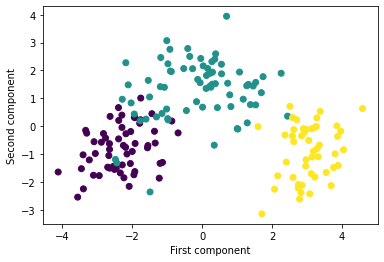

In [ ]:
# draw a cloud of colored points on the diagram, but in the coordinates of the first 
# and second principal components (columns [0] and [1] of the reduced data matrix)

plt.scatter(X_pca[0], X_pca[1], c=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.show();

---

8. Обучите снова те же методы кластеризации, но на редуцированных данных, вычислите метрики и сравните с предыдущими результатами.

In [ ]:
# train again the same clustering methods but on reduced data, calculate metrics and compare with previous results

# KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_pca)
y_pred = kmeans.predict(X_pca)

print('KMeans:')
print()
print('Silhouette score: ', silhouette_score(X_pca, y_pred))
print('Homogeneity score: ', homogeneity_score(y, y_pred))
print('Completeness score: ', completeness_score(y, y_pred))
print('V-measure score: ', v_measure_score(y, y_pred))
print('Adjusted Rand score: ', adjusted_rand_score(y, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y, y_pred))
print('Inertia: ', kmeans.inertia_)

KMeans:

Silhouette score:  0.2779213822154088
Homogeneity score:  0.8372688865150703
Completeness score:  0.8344475880291652
V-measure score:  0.8358558565678332
Adjusted Rand score:  0.8297415339237041
Adjusted Mutual Info score:  0.8341146256993133
Inertia:  1196.442725731826


In [ ]:
# agglomerative clustering

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_pca)
y_pred = agg.labels_

print('Agglomerative Clustering:')
print()
print('Silhouette score: ', silhouette_score(X_pca, y_pred))
print('Homogeneity score: ', homogeneity_score(y, y_pred))
print('Completeness score: ', completeness_score(y, y_pred))
print('V-measure score: ', v_measure_score(y, y_pred))
print('Adjusted Rand score: ', adjusted_rand_score(y, y_pred))
print('Adjusted Mutual Info score: ', adjusted_mutual_info_score(y, y_pred))

Agglomerative Clustering:

Silhouette score:  0.26960455326820665
Homogeneity score:  0.73772657791012
Completeness score:  0.7319515510127995
V-measure score:  0.7348277181213978
Adjusted Rand score:  0.7190946237450169
Adjusted Mutual Info score:  0.732021756897634
